# Tips

### Introduction:

This exercise was created based on the tutorial and documentation from [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html)  
The dataset being used is tips from Seaborn.

### Step 1. Import the necessary libraries:

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# set plot style
plt.style.use('seaborn')

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv). 

### Step 3. Assign it to a variable called tips

In [4]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv"
tips = pd.read_csv(url)
tips

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


### Step 4. Delete the Unnamed 0 column

In [7]:
tips.drop(columns = ["Unnamed: 0"], inplace = True)

In [10]:
tips["total_bill"].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

### Step 5. Plot the total_bill column histogram

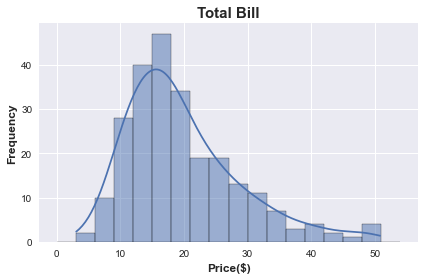

In [19]:
##plot data
bill = tips["total_bill"] # fare paid
bins = np.arange(0, 55, 3)

### plot
# kdebool
# If True, compute a kernel density estimate to smooth 
#the distribution and show on the plot as (one or more) line(s). 
sns.histplot(data=bill, bins = bins, kde=True)

plt.title('Total Bill', fontsize = 15, fontweight = "bold")
plt.xlabel('Price($)',fontsize = 12, fontweight = "bold")
plt.ylabel('Frequency',fontsize = 12, fontweight = "bold")

plt.tight_layout()
plt.show()

### Step 6. Create a scatter plot presenting the relationship between total_bill and tip

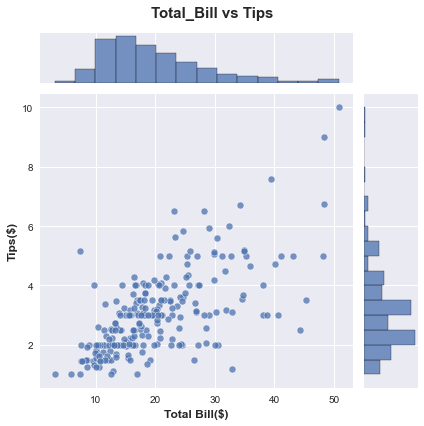

In [49]:
# plot data
x = tips["total_bill"]
y = tips["tip"]

#scatter plot
sca = sns.jointplot(x = x, y = y, alpha = 0.75)

#add overall title
sca.fig.suptitle('Total_Bill vs Tips',fontsize = 15, fontweight = "bold")

#move overall title up
sca.fig.subplots_adjust(top=.8)

# set axis labels
sca.set_axis_labels('Total Bill($)', 'Tips($)', fontsize=12, fontweight = "bold")

plt.tight_layout()
plt.show()

### Step 7.  Create one image with the relationship of total_bill, tip and size.
#### Hint: It is just one function.

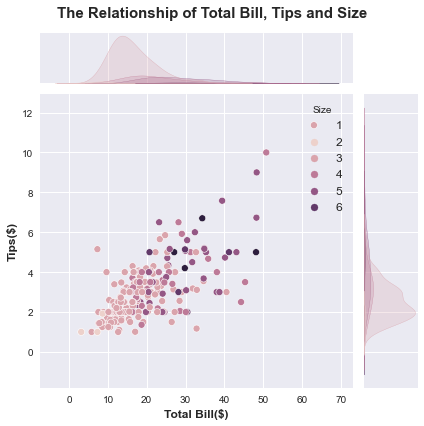

In [68]:
rel = sns.jointplot(data=tips, x="total_bill", y="tip", hue="size")

#add overall title
rel.fig.suptitle('The Relationship of Total Bill, Tips and Size',fontsize = 15, fontweight = "bold")

#move overall title up
rel.fig.subplots_adjust(top=.8)

# set axis labels
rel.set_axis_labels('Total Bill($)', 'Tips($)', fontsize=12, fontweight = "bold")

# set legend labels, can leave as it is in this question
rel.ax_joint.legend(title = "Size", labels = [1,2,3,4,5,6], fontsize=12)

plt.tight_layout()
plt.show()

### Step 8. Present the relationship between days and total_bill value

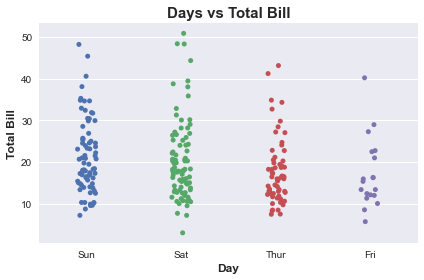

In [79]:
rel = sns.stripplot(data=tips, x="day", y="total_bill")

#add overall title
plt.title('Days vs Total Bill',fontsize = 15, fontweight = "bold")
plt.xlabel('Day',fontsize = 12, fontweight = "bold")
plt.ylabel('Total Bill',fontsize = 12, fontweight = "bold")

plt.tight_layout()
plt.show()

### Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex

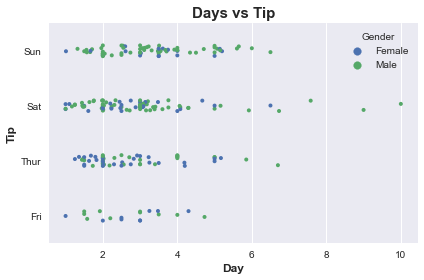

In [108]:
sns.stripplot(data=tips, x="tip", y="day", hue = "sex", size =4)

#add overall title
plt.title('Days vs Tip',fontsize = 15, fontweight = "bold")
plt.xlabel('Day',fontsize = 12, fontweight = "bold")
plt.ylabel('Tip',fontsize = 12, fontweight = "bold")

# legend label
plt.legend(title = "Gender",fontsize = 10)

plt.tight_layout()
plt.show()


### Step 10.  Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)

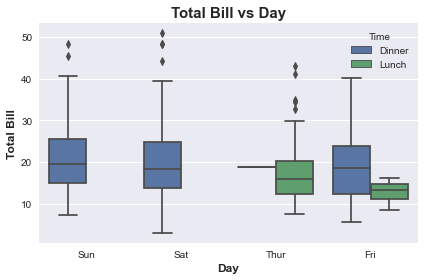

In [112]:
sns.boxplot(data = tips, y = "total_bill", x = "day", hue = "time")

#add overall title
plt.title('Total Bill vs Day',fontsize = 15, fontweight = "bold")
plt.xlabel('Day',fontsize = 12, fontweight = "bold")
plt.ylabel('Total Bill',fontsize = 12, fontweight = "bold")

# legend label
plt.legend(title = "Time",fontsize = 10)

plt.tight_layout()
plt.show()



### Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.

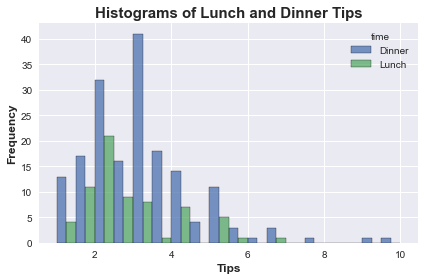

In [128]:
sns.histplot(data=tips, x="tip", hue="time", multiple="dodge")

#add overall title
plt.title('Histograms of Lunch and Dinner Tips',fontsize = 15, fontweight = "bold")
plt.xlabel('Tips',fontsize = 12, fontweight = "bold")
plt.ylabel('Frequency',fontsize = 12, fontweight = "bold")


plt.tight_layout()
plt.show()

### Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, differing by smoker or no smoker
### They must be side by side.

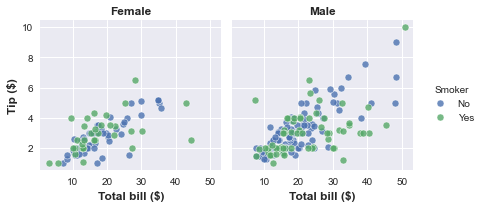

In [163]:
## solution 1
g = sns.FacetGrid(tips, col = "sex", hue = "smoker")
g.map(sns.scatterplot, "total_bill", "tip",  alpha = 0.8)


# add legend
g.add_legend(title = "Smoker",fontsize = 10)

# modify axis labels
g.set_axis_labels("Total bill ($)", "Tip ($)", fontsize = 12, fontweight = "bold")

# modify titles
g.set_titles(col_template="{col_name}", size = 12, fontweight = "bold")

g.tight_layout()
plt.show()

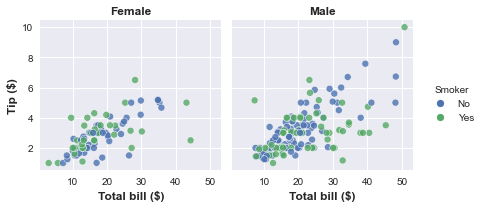

In [162]:
## solution 2
g = sns.FacetGrid(tips, col="sex")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip", hue = "smoker", alpha = 0.8)

# add legend
g.add_legend(title = "Smoker",fontsize = 10)

# modify axis labels
g.set_axis_labels("Total bill ($)", "Tip ($)", fontsize = 12, fontweight = "bold")

# modify titles
g.set_titles(col_template="{col_name}", size = 12, fontweight = "bold")

g.tight_layout()

plt.show()

### BONUS: Create your own question and answer it using a graph.

In [164]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


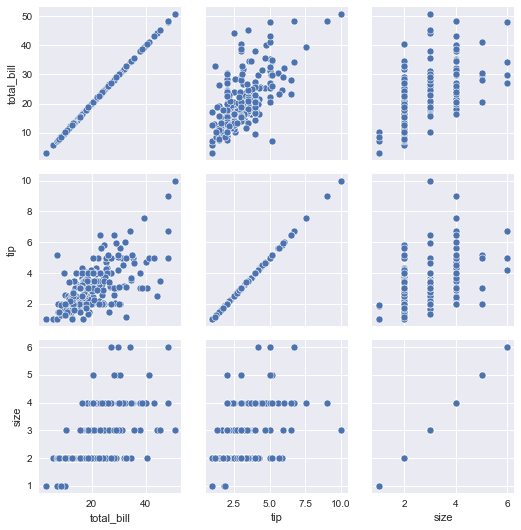

In [166]:
# get a quick scatterplot of each pair of numeric data set in tips
p = sns.PairGrid(tips)
p.map(sns.scatterplot)